In [1]:
import pyximport
pyximport.install()
#import despotic
from despotic import cloud
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as const
from astropy.visualization import quantity_support
from cycler import cycler
from itertools import cycle

make: *** No targets specified and no makefile found.  Stop.


In [2]:
g5 = cloud()
g5.nH = 1.0e2
g5.colDen = 1.0e22
g5.sigmaNT = 2.0e5 # nonthermal, turbulence
g5.Tg = 60.0
g5.comp.xoH2 = 0.1
g5.comp.xpH2 = 0.4
g5.comp.xHe = 0.1
#g5.TradDust = 1.0

In [3]:
g5.addEmitter("CO", 1.0e-4)
# 10^-13 to 10^-6
# 10^-6 to 10^-7 in high velocity gas, less than 10^-11 in ambient medium from Schilke et al 1997
#abund = np.linspace(10**(-13), 10**(-6), num=5)
abund = 10**(-7)
g5.addEmitter("SiO", abund)
#abund_1 = 10**(-8.5)
#g5.addEmitter("ph2co-h2", abund)

In [4]:
lines = g5.lineLum("SiO")

/home/savannahgramze/anaconda3/lib/python3.9/site-packages/DESPOTIC-2.2-py3.9.egg/despotic/radiation.py:107: RuntimeWarning: divide by zero encountered in true_divide
  expfacdust = np.exp(-Tnu/self.TradDust)


Text(0.5, 1.0, 'SiO with an abundance of 10$^{-7}$')

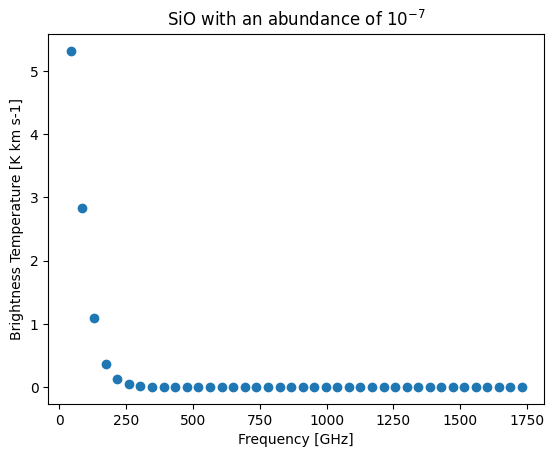

In [5]:
freq = ([l["freq"] for l in lines] * u.Hz).to(u.GHz)
TB = [l["intTB"] for l in lines] * u.K * u.km / u.second
plt.plot(freq, TB, "o")
plt.xlabel('Frequency [GHz]')
plt.ylabel('Brightness Temperature [K km s-1]')
plt.title('SiO with an abundance of 10$^{-7}$')

In [6]:
print(freq[4])

217.10498 GHz


In [7]:
def bright_temp(lines, n):
    TB = [l["intTB"] for l in lines] #* u.K * u.km / u.second
    return TB[n]

In [8]:
#### SiO
# 10^-13 to 10^-6
# 10^-6 to 10^-7 in high velocity gas, less than 10^-11 in ambient medium from Schilke et al 1997
i = 0
abund = 10**np.linspace(-13, -6, num=10)#np.linspace(10**-13, 10**-6, num=10)#
TB = np.zeros(10)
#abund = 10**(-7)

for ance in abund:
    g5.addEmitter("SiO", ance)
    lines = g5.lineLum("SiO")
    TB[i] = bright_temp(lines, n=4)
    i += 1

In [9]:
from spectral_cube import SpectralCube
from astropy import units as u

#mom0 = SpectralCube.read('/orange/adamginsburg/cmz/g5/G5/sum/spw27_SiO/g5.mom0.smK.tot.SiO.spw27.im', format='casa_image')
#cocube = SpectralCube.read('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.SiO.spw27.fits').with_spectral_unit(u.km/u.s, velocity_convention='radio')
#mom0 = cocube.moment0()

In [10]:
np.nanmax(mom0)

<Projection 4.89714977 K km / s>

NameError: name 'cocube' is not defined

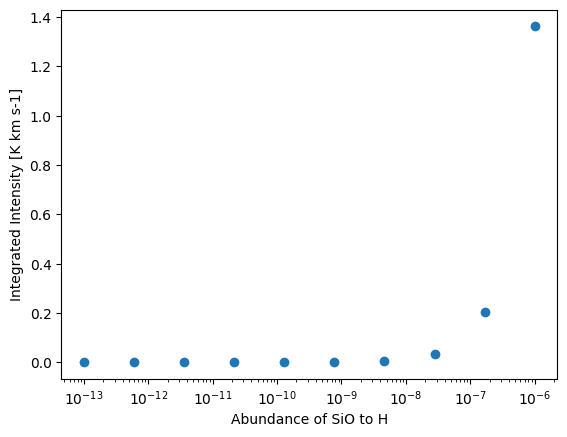

In [10]:
with quantity_support():
    plt.plot(abund, TB, "o")

    #plt.axhline(y=cocube.max(), color='r', linestyle='-', label='max')
    #plt.axhline(y=cocube.mean(), color='g', linestyle='-', label='mean')
    #plt.axhline(y=cocube.min(), color='b', linestyle='-', label='min')

    plt.ylabel("Integrated Intensity [K km s-1]")
    #plt.ylabel("Velocity Integrated Brightness Temperature [K km s-1]")
    plt.xlabel("Abundance of SiO to H")
    plt.xscale("log")
    plt.axhline(y=cocube.max(), color='r', linestyle='-', label='max')
    plt.title("Velocity-Integrated Brightness Temperature of SiO (5-4) at various Abundances")
    #plt.title("Velocity-Integrated Brightness Temperature of SiO (5-4) at various Abundances")
    plt.legend()

In [11]:
def bright_temp(lines, n):
    TB = [l["intTB"] for l in lines] #* u.K * u.km / u.second
    return TB[n]

def bright_intense(lines, n):
    inten = [l["intIntensity"] for l in lines]
    return inten[n]

In [12]:
g5.dEdt?


Signature:
g5.dEdt(
    c1Grav=0.0,
    thin=False,
    LTE=False,
    fixedLevPop=False,
    noClump=False,
    escapeProbGeom='sphere',
    PsiUser=None,
    sumOnly=False,
    dustOnly=False,
    gasOnly=False,
    dustCoolOnly=False,
    dampFactor=None,
    verbose=False,
    overrideSkip=False,
)
Docstring:
Return instantaneous values of heating / cooling terms

Parameters
   c1Grav : float
      if this is non-zero, the cloud is assumed to be
      collapsing, and energy is added at a rate
      Gamma_grav = c1 mu_H m_H cs^2 sqrt(4 pi G rho)
   thin : Boolean
      if set to True, cloud is assumed to be opticall thin
   LTE : Boolean
     if set to True, gas is assumed to be in LTE
   fixedLevPop : Boolean
     if set to True, level populations and escape
     probabilities are not recomputed, so the cooling rate is
     based on whatever values are stored
   escapeProbGeom : string, 'sphere' or 'LVG' or 'slab'
     specifies the geometry to be assumed in calculating
     escape

/home/savannahgramze/anaconda3/lib/python3.9/site-packages/DESPOTIC-2.2-py3.9.egg/despotic/radiation.py:107: RuntimeWarning: divide by zero encountered in true_divide
  expfacdust = np.exp(-Tnu/self.TradDust)


(0.1, 43.019126929661944)

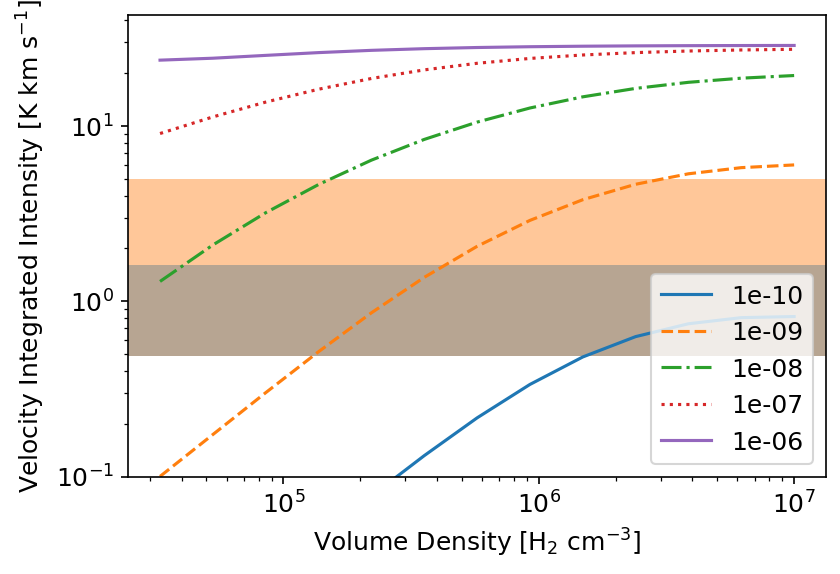

In [13]:
lines = ["-","--","-.",":"]
linecycler = cycle(lines)

### SiO

g5 = cloud()
g5.colDen = 1.0e22
g5.sigmaNT = 2.0e5 #cm/s
g5.Tg = 50#150#80.0 #50.0
g5.comp.xoH2 = 0.1
g5.comp.xpH2 = 0.4
g5.comp.xHe = 0.1
# large velocity gradient approximation 
# sigma const, but looking through less? material

vol_dense = 10**np.linspace(1, 7, num=30) # 100 to 10^8
#T_gas = np.linspace(20, 200, num=10) # 20 to 200 K
#abundance = 10**np.linspace(-13, -6, num=10) # 10^-13 to 10^-6

TB = np.zeros(vol_dense.size)
#tau = np.zeros(vol_dense.size)
#Tex = np.zeros(vol_dense.size)
#intense = np.zeros(vol_dense.size)
#Hint = np.zeros(vol_dense.size)
#Tupper = np.zeros(vol_dense.size)
#tauDust = np.zeros(vol_dense.size)

#abundance = 10**np.linspace(-13, -6, num=8) # 10^-13 to 10^-6
abundance = 10**np.linspace(-10, -6, num=5) # 10^-13 to 10^-6
#abundance = 10**np.linspace(-10, -9, num=5) # 10^-13 to 10^-6

#fig, ax = plt.subplots()
plt.figure(figsize=(6,4),dpi=150)
plt.rcParams.update({'font.size': 12})
#plt.figure(figsize=(9, 3))

#default_cycler = (cycler(linestyle=linestyle_tuple))

#plt.rc('lines', linewidth=2)
#plt.rc('axes', prop_cycle=default_cycler)
m_SiO = 44.08*u.Da
vs = np.sqrt(const.k_B * g5.Tg*u.K / m_SiO)

for a in abundance:
    for n in range(vol_dense.size): 
        g5.nH = vol_dense[n]
        g5.sigmaNT = 2e-14 * g5.colDen / g5.nH
        g5.addEmitter("SiO", a)
        lines = g5.lineLum("SiO")
        #print(g5.colDen, g5.nH, g5.sigmaNT)
        l = lines[4]
        
        if g5.sigmaNT*u.cm/u.second < vs:
            #print('don\'t plot?')
            #vs =np.sqrt(k * T / m_h2co)
            TB[n] = l['intTB']
        else: 
            TB[n] = np.nan
            
        #tau[n] = l['tau']
        #Tex[n] = l['Tex']
        #intense[n] = l['intIntensity']
        #Hint[n] = l['lumPerH']
        #Tupper[n] = l['Tupper']
        #tauDust[n] = l['tauDust']
        
        #TB[n] = bright_temp(lines,4)
        #intense[n] = bright_intense(lines, 4)
        
    #print('Abundance:', a)
    lab = format(a, '.3g') #str(a)
    
    ### Velocity Integrated Intensity versus Volume Density 
    #'''
    title = 'Abundance: ' + str(a)# + ' SiO molecules per H nucleus'
    #print(a)
    plt.plot(vol_dense, TB, next(linecycler), label=lab)
    #plt.plot(vol_dense, TB, label=lab)
    plt.xscale('log')
    plt.xlabel('Volume Density [H$_2$ cm$^{-3}$]')
    plt.ylabel('Velocity Integrated Intensity [K km s$^{-1}$]')
    try: 
        #plt.axhline(y=3.159198, color='r', linestyle='--')#, label='max') 
        
        #plt.axhline(y=4.8907389, color='k', linestyle='--')
        #plt.axhline(y=0.76873781, color='k', linestyle='--')
        
        #plt.axhspan(0.76873781, 4.8907389, facecolor='0.5', alpha=0.1)
        #plt.axhspan(0.76873781, 1.6335953, facecolor='tab:blue', alpha=0.1)
        #plt.axhspan(0.76873781, 4.8750899, facecolor='tab:orange', alpha=0.1)
        plt.axhspan(0.48853974, 1.6164163, facecolor='tab:blue', alpha=0.1) # b
        plt.axhspan(0.48853974, 4.9613779, facecolor='tab:orange', alpha=0.1)  # a 
    except:
        print('oops')
    #'''
    
    ### Tau
    '''
    plt.plot(vol_dense, tau, label=lab)
    plt.xscale('log')
    plt.xlabel('Volume Density [H cm-3]')
    plt.ylabel('Opacity')
    '''
    
     ### Excitation Temperature
    '''
    plt.plot(vol_dense, Tex,label=lab)
    plt.xscale('log')
    plt.xlabel('Volume Density [H cm-3]')
    plt.ylabel('Tex [K]')
    plt.title('Excitation Temperature')
    '''
    
    ### frequency-integrated intensity of the line after subtracting off the CMB contribution, in ergcm−2s−1sr−1 
    '''
    plt.plot(vol_dense, intense, label = lab)
    plt.xscale('log')
    plt.xlabel('Volume Density [H cm-3]')
    plt.ylabel('Frequency Integrated Intensity [erg cm−2 s−1 sr−1]')
    '''
    
    ### rate of energy emission in the line per H nucleus in the cloud, in ergs−1
    '''
    plt.plot(vol_dense, Hint,label=lab)
    plt.xscale('log')
    plt.xlabel('Volume Density [H cm-3]')
    plt.ylabel('Emission per H [erg s-1]')
    '''
    ### Tupper
    '''
    plt.plot(vol_dense, Tupper,label=lab)
    plt.xscale('log')
    plt.xlabel('Volume Density [H cm-3]')
    plt.ylabel('Tupper [K]')
    '''
    
    ### Tau Dust
    '''
    plt.plot(vol_dense, tauDust, label=lab)
    plt.xscale('log')
    plt.xlabel('Volume Density [H cm-3]')
    plt.ylabel('Dust Opacity')
    '''
    
    #plt.title(title)
    #plt.show()
plt.legend()
#plt.ylim(top=20)
plt.yscale('log')
plt.ylim(bottom=0.1) 

#plt.savefig('/orange/adamginsburg/cmz/g5/code/plots/despoticsio.png')
#plt.savefig('/orange/adamginsburg/cmz/g5/code/plots/despoticsio.pdf', bbox_inches='tight')

In [14]:
print(lines[4])

{'freq': 217104980000.0, 'upper': 5, 'lower': 4, 'Tupper': 31.259010318338213, 'Tex': 49.917947575500435, 'lumPerH': 3.7886020449867417e-28, 'intIntensity': 3.0124209152159096e-07, 'intTB': 28.72468249227014, 'tau': 478.65328315921175, 'tauDust': 0.0021712761411414616}


In [15]:
#print(Tex)

In [16]:
# L = N/n = 1e22 / 1e6
# const = sigma / L = sigma * n / N
# sigma = const * N / n
#const = g5.sigmaNT * 1e6 / 1e22
#const 
# so if the new voldense = 1e5
# g5.sigmaNT = g5.sigmaNT*10 = g5.sigmaNT * 1e6 / voldens

In [17]:
abunn = 10**-9
g5.addEmitter("HC3N-H2", abunn)


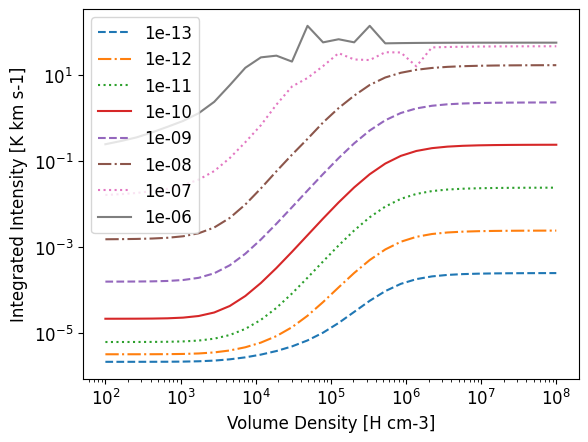

In [18]:
def bright_temp(lines, n):
    TB = [l["intTB"] for l in lines] #* u.K * u.km / u.second
    return TB[n]

### HC3N
g5 = cloud()
g5.colDen = 1.0e22
g5.sigmaNT = 2.0e5
g5.Tg = 80#150#80.0 #50.0
g5.comp.xoH2 = 0.1
g5.comp.xpH2 = 0.4
g5.comp.xHe = 0.1

vol_dense = 10**np.linspace(2, 8, num=30) # 100 to 10^8
T_gas = np.linspace(20, 200, num=10) # 20 to 200 K
#abundance = 10**np.linspace(-13, -6, num=10) # 10^-13 to 10^-6

TB = np.zeros(vol_dense.size)
abundance = 10**np.linspace(-13, -6, num=8) # 10^-13 to 10^-6

fig, ax = plt.subplots()
#plt.figure(figsize=(9, 3))

#default_cycler = (cycler(linestyle=linestyle_tuple))

#plt.rc('lines', linewidth=2)
#plt.rc('axes', prop_cycle=default_cycler)

for a in abundance:
    for n in range(vol_dense.size):
        g5.nH = vol_dense[n]
        g5.sigmaNT = 2e-14 * g5.colDen / g5.nH
        g5.addEmitter("HC3N-H2", a)
        lines = g5.lineLum("HC3N-H2")
        TB[n] = bright_temp(lines, 23)
    #print('Abundance:', a)
    
    title = 'Abundance: ' + str(a)# + ' SiO molecules per H nucleus'
    #print(a)
    lab = format(a, '.3g') #str(a)
    plt.plot(vol_dense, TB, next(linecycler), label=lab)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Volume Density [H cm-3]')
    plt.ylabel('Integrated Intensity [K km s-1]')
    #try: 
    #    ax.axhline(y=3.159198, color='r', linestyle='-')#, label='max')
    #except:
    #    print('oops')
    #plt.title(title)
    #plt.show()
plt.legend()
#plt.ylim(top=5)
#plt.ylim(bottom=0)
freq = ([l["freq"] for l in lines] * u.Hz).to(u.GHz)


In [19]:
print(freq[23]) # ~218

218.32472 GHz


In [20]:
freq[23]

<Quantity 218.32472 GHz>

In [21]:
g5.addEmitter('ph2co-h2', 19**-8)

In [22]:
lines = g5.lineLum("ph2co-h2")

In [23]:
freq = ([l["freq"] for l in lines] * u.Hz).to(u.GHz)
freq[2]

<Quantity 218.222192 GHz>

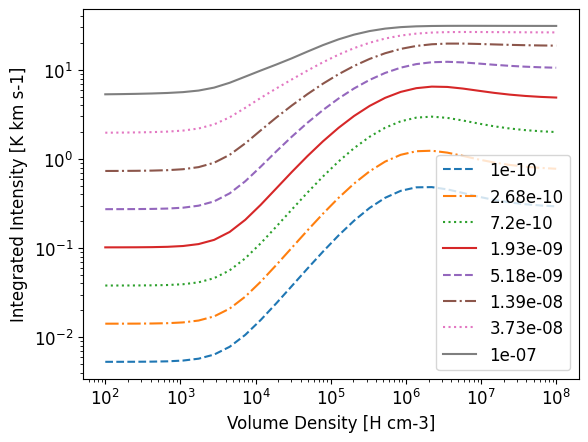

In [24]:
def bright_temp(lines, n):
    TB = [l["intTB"] for l in lines] #* u.K * u.km / u.second
    return TB[n]

### H2CO
g5 = cloud()
g5.colDen = 1.0e22
g5.sigmaNT = 2.0e5
g5.Tg = 50#150#80.0 #50.0
g5.comp.xoH2 = 0.1
g5.comp.xpH2 = 0.4
g5.comp.xHe = 0.1

vol_dense = 10**np.linspace(2, 8, num=30) # 100 to 10^8
T_gas = np.linspace(20, 200, num=10) # 20 to 200 K
#abundance = 10**np.linspace(-13, -6, num=10) # 10^-13 to 10^-6

TB = np.zeros(vol_dense.size)
abundance = 10**np.linspace(-10, -7, num=8) # 10^-13 to 10^-6

fig, ax = plt.subplots()
#plt.figure(figsize=(9, 3))

#default_cycler = (cycler(linestyle=linestyle_tuple))

#plt.rc('lines', linewidth=2)
#plt.rc('axes', prop_cycle=default_cycler)

for a in abundance:
    for n in range(vol_dense.size):
        g5.nH = vol_dense[n]
        g5.sigmaNT = 2e-14 * g5.colDen / g5.nH
        g5.addEmitter("ph2co-h2", a)
        lines = g5.lineLum("ph2co-h2")
        TB[n] = bright_temp(lines, 2)
    #print('Abundance:', a)
    
    title = 'Abundance: ' + str(a)# + ' SiO molecules per H nucleus'
    #print(a)
    lab = format(a, '.3g') #str(a)
    plt.plot(vol_dense, TB, next(linecycler), label=lab)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Volume Density [H cm-3]')
    plt.ylabel('Integrated Intensity [K km s-1]')
    #try: 
    #    ax.axhline(y=3.159198, color='r', linestyle='-')#, label='max')
    #except:
    #    print('oops')
    #plt.title(title)
    #plt.show()
plt.legend()
#plt.ylim(top=5)
#plt.ylim(bottom=0)
freq = ([l["freq"] for l in lines] * u.Hz).to(u.GHz)


(0.1, 44.60477903848571)

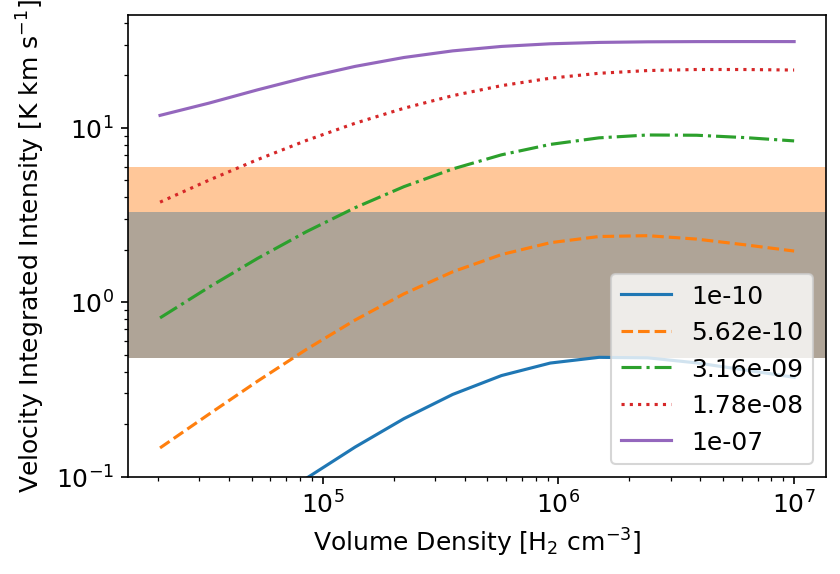

In [26]:
lines = ["-","--","-.",":"]
linecycler = cycle(lines)

### H2CO

g5 = cloud()
g5.colDen = 1.0e22
g5.sigmaNT = 2.0e5 #cm/s
g5.Tg = 50#150#80.0 #50.0
g5.comp.xoH2 = 0.1
g5.comp.xpH2 = 0.4
g5.comp.xHe = 0.1
# large velocity gradient approximation 
# sigma const, but looking through less? material

vol_dense = 10**np.linspace(1, 7, num=30) # 100 to 10^8
T_gas = np.linspace(20, 200, num=10) # 20 to 200 K
abundance = 10**np.linspace(-10, -7, num=5)
#abundance = 10**np.linspace(-13, -6, num=10) # 10^-13 to 10^-6

TB = np.zeros(vol_dense.size)
tau = np.zeros(vol_dense.size)
Tex = np.zeros(vol_dense.size)
#intense = np.zeros(vol_dense.size)
#Hint = np.zeros(vol_dense.size)
#Tupper = np.zeros(vol_dense.size)
#tauDust = np.zeros(vol_dense.size)

#abundance = 10**np.linspace(-13, -6, num=8) # 10^-13 to 10^-6
abundance = 10**np.linspace(-10, -7, num=5) # 10^-13 to 10^-6
#abundance = 10**np.linspace(-10, -9, num=5) # 10^-13 to 10^-6

#fig, ax = plt.subplots()
plt.figure(figsize=(6,4),dpi=150)
plt.rcParams.update({'font.size': 12})
#plt.figure(figsize=(9, 3))

#default_cycler = (cycler(linestyle=linestyle_tuple))

#plt.rc('lines', linewidth=2)
#plt.rc('axes', prop_cycle=default_cycler)
m_h2co = 30.031*u.Da
vs = np.sqrt(const.k_B * g5.Tg*u.K / m_h2co)

for a in abundance:
    for n in range(vol_dense.size): 
        g5.nH = vol_dense[n]
        g5.sigmaNT = 2e-14 * g5.colDen / g5.nH
        
        #print(g5.sigmaNT)
        g5.addEmitter("ph2co-h2", a)
        lines = g5.lineLum("ph2co-h2")
        #print(g5.colDen, g5.nH, g5.sigmaNT)
        l = lines[2]
        
        if g5.sigmaNT*u.cm/u.second < vs:
            #print('don\'t plot?')
            #vs =np.sqrt(k * T / m_h2co)
            TB[n] = l['intTB']
        else: 
            TB[n] = np.nan
        
        
        #tau[n] = l['tau']
        #Tex[n] = l['Tex']
        #intense[n] = l['intIntensity']
        #Hint[n] = l['lumPerH']
        #Tupper[n] = l['Tupper']
        #tauDust[n] = l['tauDust']
        
        #TB[n] = bright_temp(lines,4)
        #intense[n] = bright_intense(lines, 4)
        
    #print('Abundance:', a)
    lab = format(a, '.3g') #str(a)
    
    ### Velocity Integrated Intensity versus Volume Density 
    #'''
    title = 'Abundance: ' + str(a)# + ' SiO molecules per H nucleus'
    #print(a)
    plt.plot(vol_dense, TB, next(linecycler), label=lab)
    #plt.plot(vol_dense, TB, label=lab)
    plt.xscale('log')
    plt.xlabel('Volume Density [H$_2$ cm$^{-3}$]')
    plt.ylabel('Velocity Integrated Intensity [K km s$^{-1}$]')
    try: 
        #plt.axhline(y=3.159198, color='r', linestyle='--')#, label='max') 
        
        #plt.axhline(y=4.8907389, color='k', linestyle='--')
        #plt.axhline(y=0.76873781, color='k', linestyle='--')
        
        plt.axhspan(0.47637372, 5.9633835, facecolor='tab:orange', alpha=0.1)
        plt.axhspan(0.47637372, 3.311673, facecolor='tab:blue', alpha=0.1)
    except:
        print('oops')
    #'''
    
    ### Tau
    '''
    plt.plot(vol_dense, tau, label=lab)
    plt.xscale('log')
    plt.xlabel('Volume Density [H cm-3]')
    plt.ylabel('Opacity')
    '''
    
     ### Excitation Temperature
    '''
    plt.plot(vol_dense, Tex,label=lab)
    plt.xscale('log')
    plt.xlabel('Volume Density [H cm-3]')
    plt.ylabel('Tex [K]')
    plt.title('Excitation Temperature')
    '''
    
    ### frequency-integrated intensity of the line after subtracting off the CMB contribution, in ergcm−2s−1sr−1 
    '''
    plt.plot(vol_dense, intense, label = lab)
    plt.xscale('log')
    plt.xlabel('Volume Density [H cm-3]')
    plt.ylabel('Frequency Integrated Intensity [erg cm−2 s−1 sr−1]')
    '''
    
    ### rate of energy emission in the line per H nucleus in the cloud, in ergs−1
    '''
    plt.plot(vol_dense, Hint,label=lab)
    plt.xscale('log')
    plt.xlabel('Volume Density [H cm-3]')
    plt.ylabel('Emission per H [erg s-1]')
    '''
    ### Tupper
    '''
    plt.plot(vol_dense, Tupper,label=lab)
    plt.xscale('log')
    plt.xlabel('Volume Density [H cm-3]')
    plt.ylabel('Tupper [K]')
    '''
    
    ### Tau Dust
    '''
    plt.plot(vol_dense, tauDust, label=lab)
    plt.xscale('log')
    plt.xlabel('Volume Density [H cm-3]')
    plt.ylabel('Dust Opacity')
    '''
    
    #plt.title(title)
    #plt.show()
plt.legend()
#plt.ylim(top=20)
plt.yscale('log')
plt.ylim(bottom=0.1) 

#plt.savefig('/orange/adamginsburg/cmz/g5/code/plots/despotich2co.pdf', bbox_inches='tight')

In [27]:
#vs.to(u.cm/u.second)

In [28]:
const.k_B.to(u.m**2 * u.kg * u.second**(-2) * u.K**(-1))

<Quantity 1.380649e-23 kg m2 / (K s2)>

In [29]:
m_h2co.to(u.kg)

<Quantity 4.98676487e-26 kg>

In [30]:
0.4/0.1

4.0

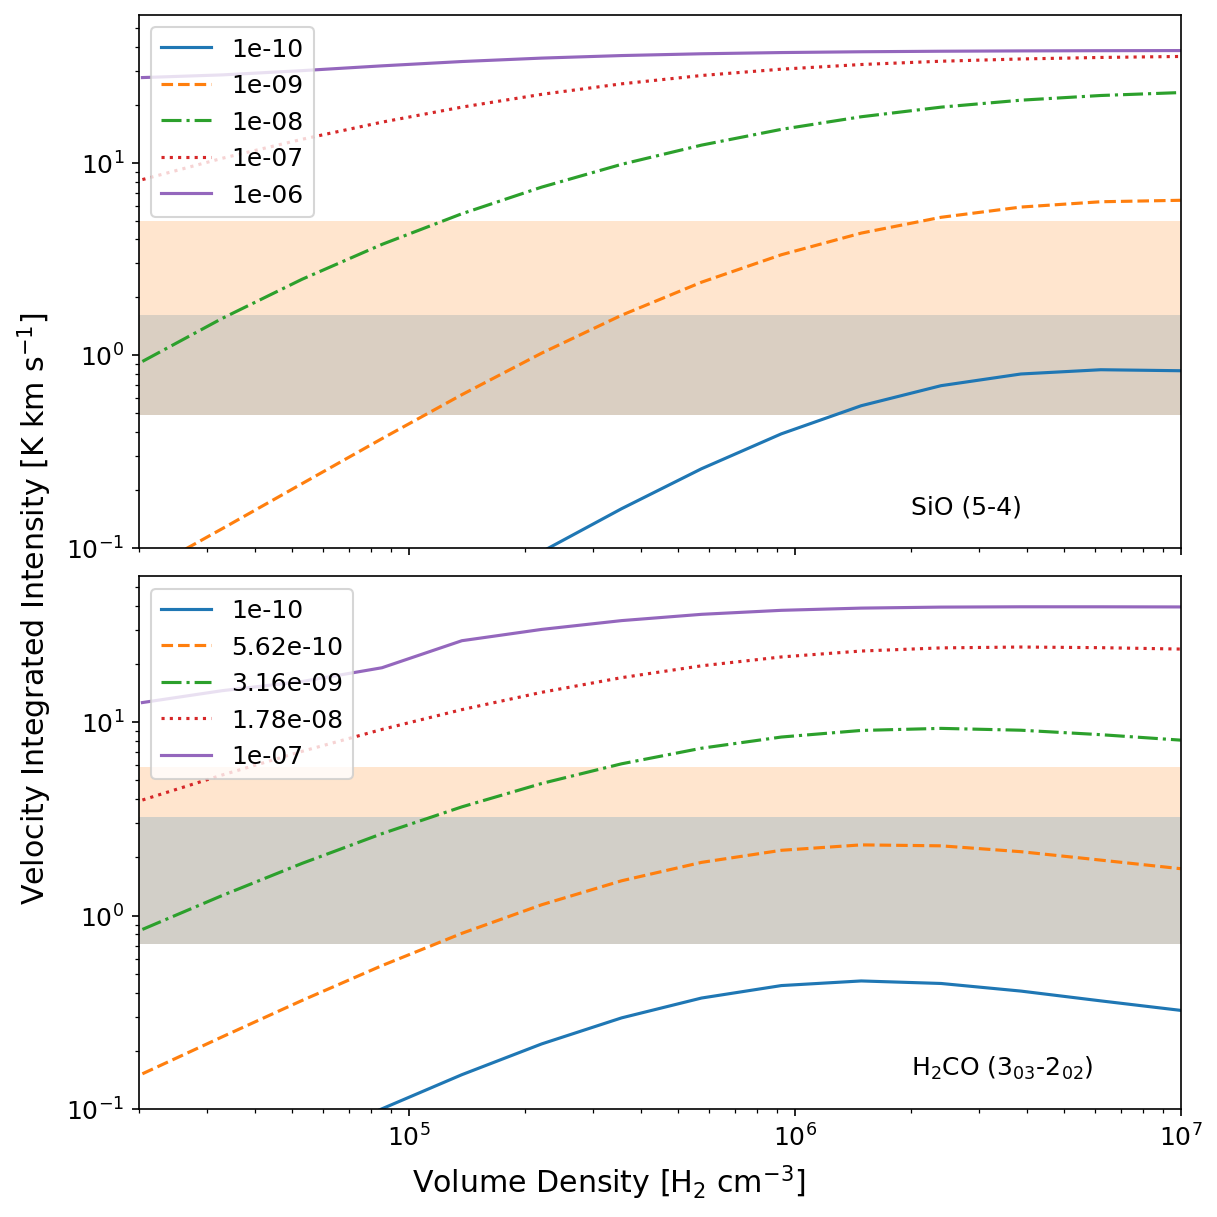

In [32]:
lines = ["-","--","-.",":"]
linecycler = cycle(lines)

fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0}, constrained_layout=True, dpi=150)
#plt.figure(figsize=(6,4),dpi=150)
#plt.rcParams.update({'font.size': 12})

### SiO and H2CO

g5 = cloud()
g5.colDen = 1.0e22
g5.sigmaNT = 2.0e5 #cm/s
g5.Tg = 60#150#80.0 #50.0
g5.comp.xoH2 = 0.1
g5.comp.xpH2 = 0.4
g5.comp.xHe = 0.1

vol_dense = 10**np.linspace(1, 7, num=30) # 100 to 10^8
TB = np.zeros(vol_dense.size)
abundance = 10**np.linspace(-10, -6, num=5) # 10^-13 to 10^-6

plt.rcParams.update({'font.size': 12})


m_SiO = 44.08*u.Da
vs = np.sqrt(const.k_B * g5.Tg*u.K / m_SiO)

for a in abundance:
    for n in range(vol_dense.size): 
        g5.nH = vol_dense[n]
        g5.sigmaNT = 2e-14 * g5.colDen / g5.nH
        g5.addEmitter("SiO", a)
        lines = g5.lineLum("SiO")
        l = lines[4]
        
        if g5.sigmaNT*u.cm/u.second < vs:
            TB[n] = l['intTB']
        else: 
            TB[n] = np.nan


    lab = format(a, '.3g') #str(a)
    axs[0].plot(vol_dense, TB, next(linecycler), label=lab)
# SiO    
#axs[0].axhspan(0.76873781, 1.6335953, facecolor='tab:blue', alpha=0.2) # a
#axs[0].axhspan(0.76873781, 4.8750899, facecolor='tab:orange', alpha=0.2)  # b 

axs[0].axhspan(0.48853974, 1.6164163, facecolor='tab:blue', alpha=0.2) # b
axs[0].axhspan(0.48853974, 4.9613779, facecolor='tab:orange', alpha=0.2)  # a 

axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_ylim(bottom=0.1)
axs[0].legend(loc='upper left')

lines = ["-","--","-.",":"]
linecycler = cycle(lines)

vol_dense = 10**np.linspace(1, 7, num=30) 
abundance = 10**np.linspace(-10, -7, num=5)

m_h2co = 30.031*u.Da
vs = np.sqrt(const.k_B * g5.Tg*u.K / m_h2co)

for a in abundance:
    for n in range(vol_dense.size): 
        g5.nH = vol_dense[n]
        g5.sigmaNT = 2e-14 * g5.colDen / g5.nH
        
        #print(g5.sigmaNT)
        g5.addEmitter("ph2co-h2", a)
        lines = g5.lineLum("ph2co-h2")
        #print(g5.colDen, g5.nH, g5.sigmaNT)
        l = lines[2]
        
        if g5.sigmaNT*u.cm/u.second < vs:
            #print('don\'t plot?')
            #vs =np.sqrt(k * T / m_h2co)
            TB[n] = l['intTB']
        else: 
            TB[n] = np.nan
    # what
    lab = format(a, '.3g') #str(a)
    title = 'Abundance: ' + str(a)
    axs[1].plot(vol_dense, TB, next(linecycler), label=lab)

# H2CO        
#axs[1].axhspan(0.47637372, 5.9633835, facecolor='tab:orange', alpha=0.2) # a
#axs[1].axhspan(0.47637372, 3.311673, facecolor='tab:blue', alpha=0.2) # b
axs[1].axhspan(0.71664655, 5.8476086, facecolor='tab:orange', alpha=0.2) # a
axs[1].axhspan(0.71664655, 3.2353006, facecolor='tab:blue', alpha=0.2) # b

axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_ylim(bottom=0.1)
axs[1].legend(loc='upper left')

axs[1].set_xlim(left=2*10**4, right=10**7)

fig.supxlabel('Volume Density [H$_2$ cm$^{-3}$]')
fig.supylabel('Velocity Integrated Intensity [K km s$^{-1}$]')

axs[0].text(2*10**6, 0.15, 'SiO (5-4)')
axs[1].text(2*10**6, 0.15, 'H$_2$CO (3$_{03}$-2$_{02}$)')

fig.set_figheight(8)
fig.set_figwidth(8)

#plt.savefig('/orange/adamginsburg/cmz/g5/code/plots/despoticcombo.pdf', bbox_inches='tight')

/home/savannahgramze/anaconda3/lib/python3.9/site-packages/DESPOTIC-2.2-py3.9.egg/despotic/radiation.py:107: RuntimeWarning: divide by zero encountered in true_divide
  expfacdust = np.exp(-Tnu/self.TradDust)


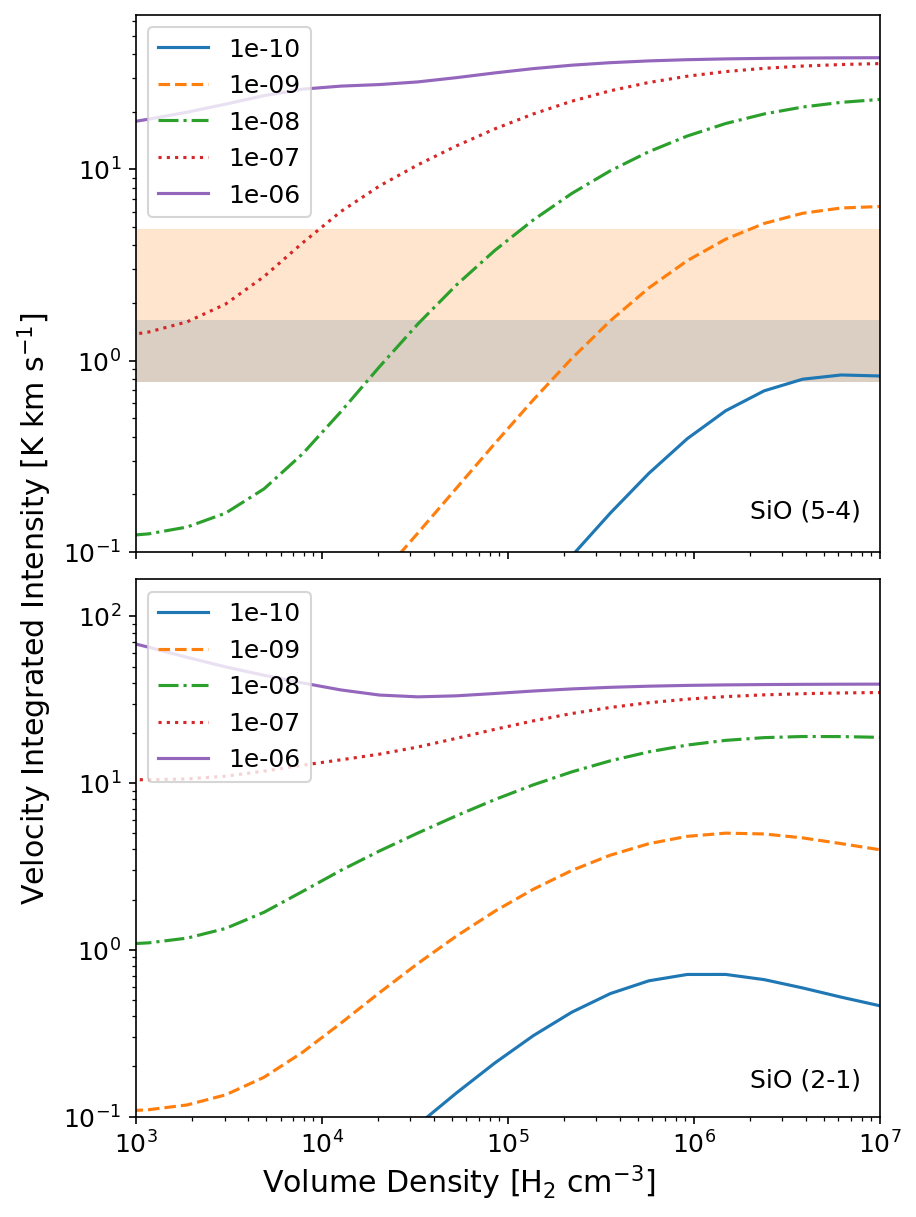

In [49]:
lines = ["-","--","-.",":"]
linecycler = cycle(lines)

fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0}, constrained_layout=True, dpi=150)
#plt.figure(figsize=(6,4),dpi=150)
#plt.rcParams.update({'font.size': 12})

### SiO and H2CO

g5 = cloud()
g5.colDen = 1.0e22
g5.sigmaNT = 2.0e5 #cm/s
g5.Tg = 60#150#80.0 #50.0
g5.comp.xoH2 = 0.1
g5.comp.xpH2 = 0.4
g5.comp.xHe = 0.1

vol_dense = 10**np.linspace(1, 7, num=30) # 100 to 10^8
TB = np.zeros(vol_dense.size)
abundance = 10**np.linspace(-10, -6, num=5) # 10^-13 to 10^-6

plt.rcParams.update({'font.size': 12})


m_SiO = 44.08*u.Da
vs = np.sqrt(const.k_B * g5.Tg*u.K / m_SiO)

for a in abundance:
    for n in range(vol_dense.size): 
        g5.nH = vol_dense[n]
        g5.sigmaNT = 2e-14 * g5.colDen / g5.nH
        g5.addEmitter("SiO", a)
        lines = g5.lineLum("SiO")
        l = lines[4]
        TB[n] = l['intTB']
        
        #if g5.sigmaNT*u.cm/u.second < vs:
        #    TB[n] = l['intTB']
        #else: 
        #    TB[n] = np.nan


    lab = format(a, '.3g') #str(a)
    axs[0].plot(vol_dense, TB, next(linecycler), label=lab)
# SiO    
axs[0].axhspan(0.76873781, 1.6335953, facecolor='tab:blue', alpha=0.2) # a
axs[0].axhspan(0.76873781, 4.8750899, facecolor='tab:orange', alpha=0.2)  # b 

axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_ylim(bottom=0.1)
axs[0].legend(loc='upper left')

lines = ["-","--","-.",":"]
linecycler = cycle(lines)

vol_dense = 10**np.linspace(1, 7, num=30) 
abundance = 10**np.linspace(-10, -6, num=5) # 10^-13 to 10^-6

m_SiO = 44.08*u.Da
vs = np.sqrt(const.k_B * g5.Tg*u.K / m_SiO)

for a in abundance:
    for n in range(vol_dense.size): 
        g5.nH = vol_dense[n]
        g5.sigmaNT = 2e-14 * g5.colDen / g5.nH
        g5.addEmitter("SiO", a)
        lines = g5.lineLum("SiO")
        l = lines[2]
        TB[n] = l['intTB']
        
        #if g5.sigmaNT*u.cm/u.second < vs:
        #    TB[n] = l['intTB']
        #else: 
        #    TB[n] = np.nan


    lab = format(a, '.3g') #str(a)
    axs[1].plot(vol_dense, TB, next(linecycler), label=lab)
# SiO    

axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_ylim(bottom=0.1)
axs[1].legend(loc='upper left')

axs[1].set_xlim(left=10**3, right=10**7)

fig.supxlabel('Volume Density [H$_2$ cm$^{-3}$]')
fig.supylabel('Velocity Integrated Intensity [K km s$^{-1}$]')

axs[0].text(2*10**6, 0.15, 'SiO (5-4)')
axs[1].text(2*10**6, 0.15, 'SiO (2-1)')

fig.set_figheight(8)
fig.set_figwidth(6)

#plt.savefig('/orange/adamginsburg/cmz/g5/code/plots/despoticcombo.pdf', bbox_inches='tight')
plt.savefig('/mnt/c/Users/panda/Documents/Research/plots/siocombo.pdf', bbox_inches='tight')
plt.savefig('/mnt/c/Users/panda/Documents/Research/plots/siocombo.png', bbox_inches='tight')

In [46]:
ls /mnt/c/Users/panda/Documents/Research/plots

edges.png*   galactic_overview_plots.pdf*  linewidth/  mom0/
edges2.png*  gcws/                         misc/       pvdiagrams/


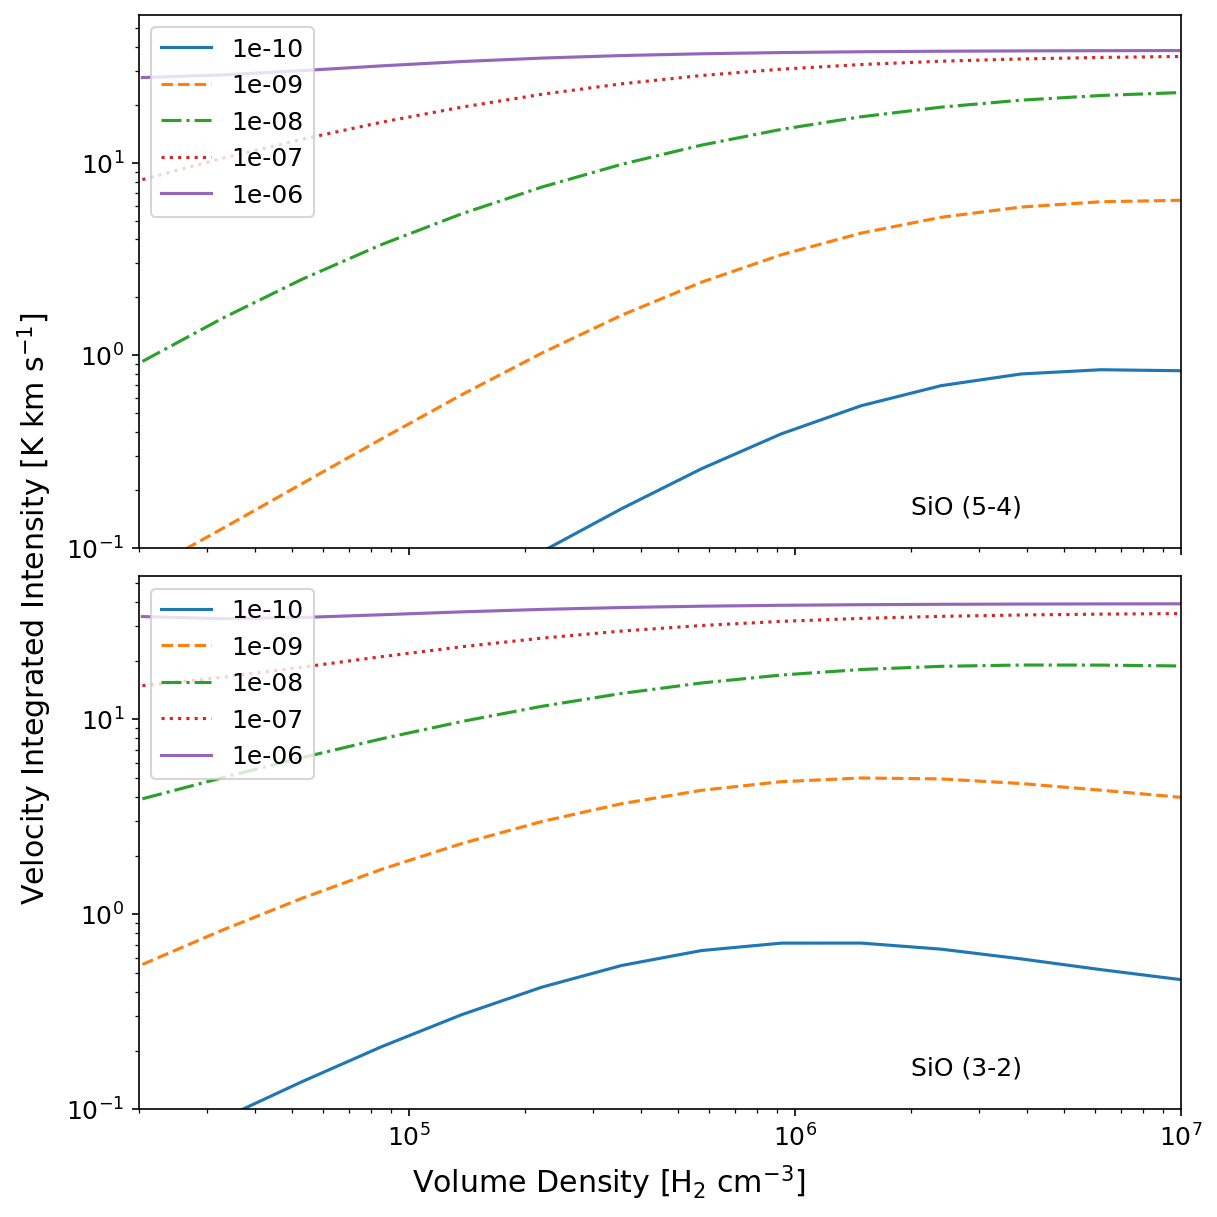

In [33]:
lines = ["-","--","-.",":"]
linecycler = cycle(lines)

fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0}, constrained_layout=True, dpi=150)
#plt.figure(figsize=(6,4),dpi=150)
#plt.rcParams.update({'font.size': 12})

### SiO and H2CO

g5 = cloud()
g5.colDen = 1.0e22
g5.sigmaNT = 2.0e5 #cm/s
g5.Tg = 60#150#80.0 #50.0
g5.comp.xoH2 = 0.1
g5.comp.xpH2 = 0.4
g5.comp.xHe = 0.1

vol_dense = 10**np.linspace(1, 7, num=30) # 100 to 10^8
TB = np.zeros(vol_dense.size)
abundance = 10**np.linspace(-10, -6, num=5) # 10^-13 to 10^-6

plt.rcParams.update({'font.size': 12})


m_SiO = 44.08*u.Da
vs = np.sqrt(const.k_B * g5.Tg*u.K / m_SiO)

for a in abundance:
    for n in range(vol_dense.size): 
        g5.nH = vol_dense[n]
        g5.sigmaNT = 2e-14 * g5.colDen / g5.nH
        g5.addEmitter("SiO", a)
        lines = g5.lineLum("SiO")
        l = lines[4]
        
        if g5.sigmaNT*u.cm/u.second < vs:
            TB[n] = l['intTB']
        else: 
            TB[n] = np.nan


    lab = format(a, '.3g') #str(a)
    axs[0].plot(vol_dense, TB, next(linecycler), label=lab)
# SiO    
#axs[0].axhspan(0.76873781, 1.6335953, facecolor='tab:blue', alpha=0.2) # a
#axs[0].axhspan(0.76873781, 4.8750899, facecolor='tab:orange', alpha=0.2)  # b 

#axs[0].axhspan(0.48853974, 1.6164163, facecolor='tab:blue', alpha=0.2) # b
#axs[0].axhspan(0.48853974, 4.9613779, facecolor='tab:orange', alpha=0.2)  # a 

axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_ylim(bottom=0.1)
axs[0].legend(loc='upper left')

lines = ["-","--","-.",":"]
linecycler = cycle(lines)

g5 = cloud()
g5.colDen = 1.0e22
g5.sigmaNT = 2.0e5 #cm/s
g5.Tg = 60#150#80.0 #50.0
g5.comp.xoH2 = 0.1
g5.comp.xpH2 = 0.4
g5.comp.xHe = 0.1

vol_dense = 10**np.linspace(1, 7, num=30) # 100 to 10^8
TB = np.zeros(vol_dense.size)
abundance = 10**np.linspace(-10, -6, num=5) # 10^-13 to 10^-6

plt.rcParams.update({'font.size': 12})


m_SiO = 44.08*u.Da
vs = np.sqrt(const.k_B * g5.Tg*u.K / m_SiO)

for a in abundance:
    for n in range(vol_dense.size): 
        g5.nH = vol_dense[n]
        g5.sigmaNT = 2e-14 * g5.colDen / g5.nH
        g5.addEmitter("SiO", a)
        lines = g5.lineLum("SiO")
        l = lines[2]
        
        if g5.sigmaNT*u.cm/u.second < vs:
            TB[n] = l['intTB']
        else: 
            TB[n] = np.nan


    lab = format(a, '.3g') #str(a)
    axs[1].plot(vol_dense, TB, next(linecycler), label=lab)

axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_ylim(bottom=0.1)
axs[1].legend(loc='upper left')

axs[1].set_xlim(left=2*10**4, right=10**7)

fig.supxlabel('Volume Density [H$_2$ cm$^{-3}$]')
fig.supylabel('Velocity Integrated Intensity [K km s$^{-1}$]')

axs[0].text(2*10**6, 0.15, 'SiO (5-4)')
axs[1].text(2*10**6, 0.15, 'SiO (3-2)')

fig.set_figheight(8)
fig.set_figwidth(8)



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.02, 0.5, 'Velocity Integrated Intensity [K km s$^{-1}$]')

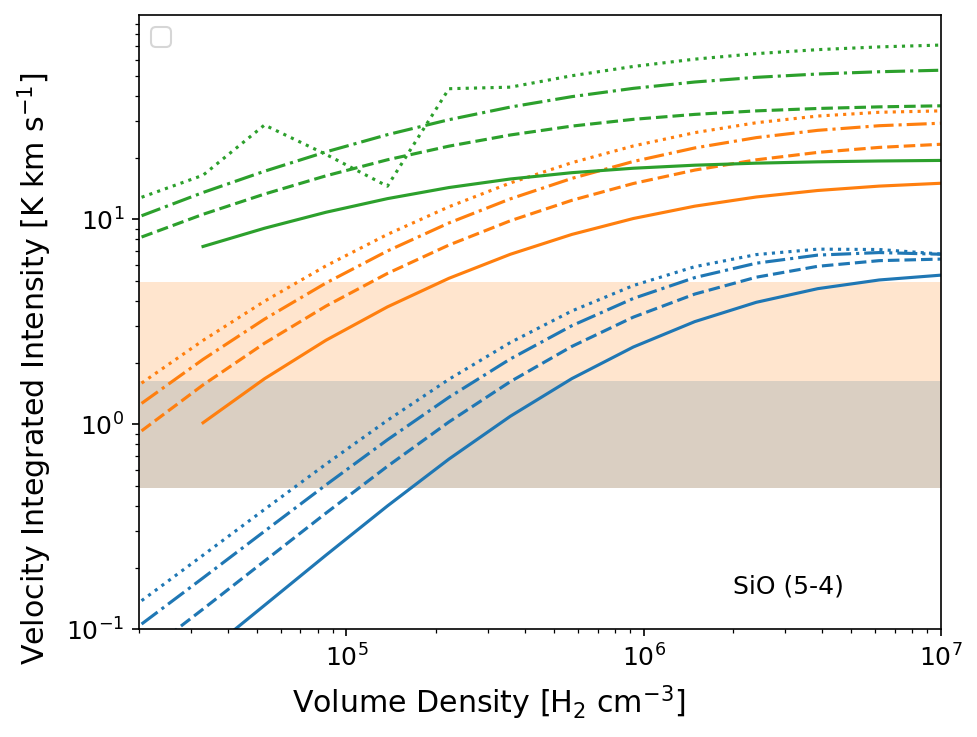

In [34]:
lines = ["-","--","-.",":"]
linecycler = cycle(lines)

fig, axs = plt.subplots(1, sharex=True, gridspec_kw={'hspace': 0}, constrained_layout=True, dpi=150)
#plt.figure(figsize=(6,4),dpi=150)
#plt.rcParams.update({'font.size': 12})

### SiO and H2CO

temps = [40, 60, 80, 100]#*u.K
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

g5 = cloud()
g5.colDen = 1.0e22
g5.sigmaNT = 2.0e5 #cm/s
g5.Tg = 60#150#80.0 #50.0
g5.comp.xoH2 = 0.1
g5.comp.xpH2 = 0.4
g5.comp.xHe = 0.1

vol_dense = 10**np.linspace(1, 7, num=30) # 100 to 10^8
TB = np.zeros(vol_dense.size)
abundance = [10**-9, 10**-8, 10**-7]#10**np.linspace(-10, -6, num=5) # 10^-13 to 10^-6

plt.rcParams.update({'font.size': 12})


m_SiO = 44.08*u.Da
vs = np.sqrt(const.k_B * g5.Tg*u.K / m_SiO)

for a in range(len(abundance)):
    g5.addEmitter("SiO", abundance[a])
    
    for t in range(len(temps)):
        g5.Tg = temps[t]
        vs = np.sqrt(const.k_B * g5.Tg*u.K / m_SiO)
        for n in range(vol_dense.size):
            g5.nH = vol_dense[n]
            g5.sigmaNT = 2e-14 * g5.colDen / g5.nH
            lines = g5.lineLum("SiO")
            l = lines[4]
            
            if g5.sigmaNT*u.cm/u.second < vs:
                TB[n] = l['intTB']
            else: 
                TB[n] = np.nan
        #lab = format(abundance[a], '.3g') #str(a)
        #axs.plot(vol_dense, TB, next(linecycler), color=colors[a], label=lab)
        axs.plot(vol_dense, TB, next(linecycler), color=colors[a])#, label=str(temps[t]) + 'K')


#for a in range(len(abundance)):
#    for n in range(vol_dense.size): 
#        for t in range(len(temps)):
#            g5.Tg = temps[t]
#            g5.nH = vol_dense[n]
#            g5.sigmaNT = 2e-14 * g5.colDen / g5.nH
#            g5.addEmitter("SiO", abundance[a])
#            lines = g5.lineLum("SiO")
#            l = lines[4]
#
#            if g5.sigmaNT*u.cm/u.second < vs:
#                TB[n] = l['intTB']
#            else: 
#                TB[n] = np.nan
#        axs.plot(vol_dense, TB, next(linecycler), color=colors[a])
#
    #lab = format(a, '.3g') #str(a)
    
# SiO    
#axs[0].axhspan(0.76873781, 1.6335953, facecolor='tab:blue', alpha=0.2) # a
#axs[0].axhspan(0.76873781, 4.8750899, facecolor='tab:orange', alpha=0.2)  # b 

axs.axhspan(0.48853974, 1.6164163, facecolor='tab:blue', alpha=0.2) # b
axs.axhspan(0.48853974, 4.9613779, facecolor='tab:orange', alpha=0.2)  # a 

axs.set_xscale('log')
axs.set_yscale('log')
axs.set_ylim(bottom=0.1)
axs.legend(loc='upper left')

axs.text(2*10**6, 0.15, 'SiO (5-4)')
axs.set_xlim(left=2*10**4, right=10**7)


fig.supxlabel('Volume Density [H$_2$ cm$^{-3}$]')
fig.supylabel('Velocity Integrated Intensity [K km s$^{-1}$]')

#fig.set_figheight(8)
#fig.set_figwidth(8)

Text(0.02, 0.5, 'Velocity Integrated Intensity [K km s$^{-1}$]')

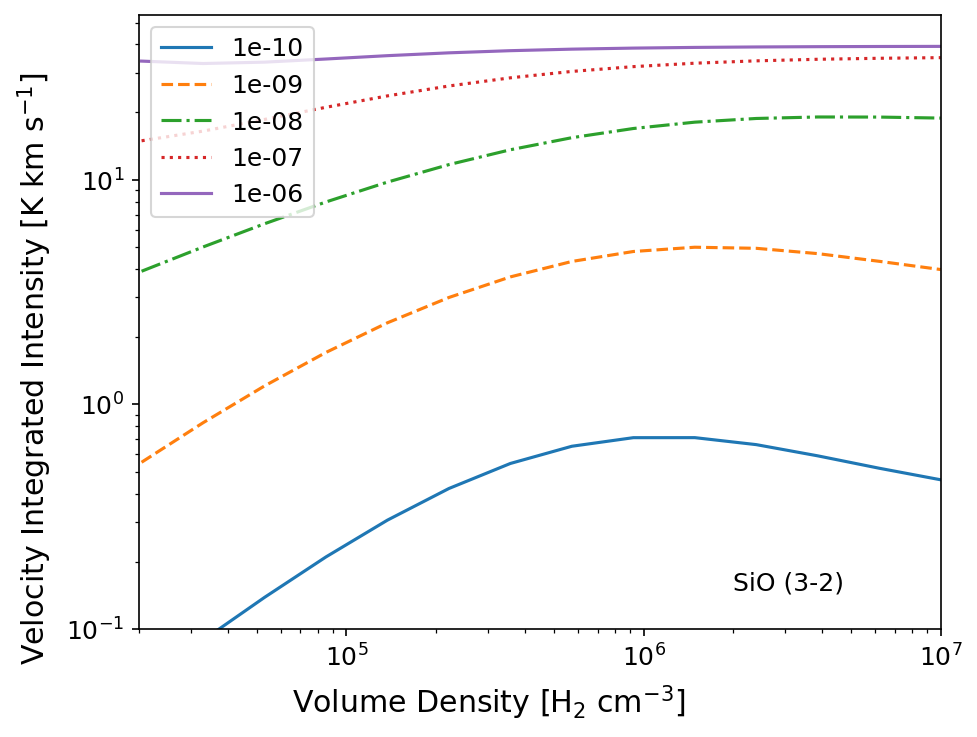

In [35]:
lines = ["-","--","-.",":"]
linecycler = cycle(lines)

fig, axs = plt.subplots(1, sharex=True, gridspec_kw={'hspace': 0}, constrained_layout=True, dpi=150)
#plt.figure(figsize=(6,4),dpi=150)
#plt.rcParams.update({'font.size': 12})

### SiO and H2CO

temps = [60]#*u.K
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

g5 = cloud()
g5.colDen = 1.0e22
g5.sigmaNT = 2.0e5 #cm/s
g5.Tg = 60#150#80.0 #50.0
g5.comp.xoH2 = 0.1
g5.comp.xpH2 = 0.4
g5.comp.xHe = 0.1

vol_dense = 10**np.linspace(1, 7, num=30) # 100 to 10^8
TB = np.zeros(vol_dense.size)
abundance = 10**np.linspace(-10, -6, num=5) # 10^-13 to 10^-6

plt.rcParams.update({'font.size': 12})


m_SiO = 44.08*u.Da
vs = np.sqrt(const.k_B * g5.Tg*u.K / m_SiO)

for a in range(len(abundance)):
    g5.addEmitter("SiO", abundance[a])
    
    for t in range(len(temps)):
        g5.Tg = temps[t]
        vs = np.sqrt(const.k_B * g5.Tg*u.K / m_SiO)
        for n in range(vol_dense.size):
            g5.nH = vol_dense[n]
            g5.sigmaNT = 2e-14 * g5.colDen / g5.nH
            lines = g5.lineLum("SiO")
            l = lines[2]
            
            if g5.sigmaNT*u.cm/u.second < vs:
                TB[n] = l['intTB']
            else: 
                TB[n] = np.nan
        lab = format(abundance[a], '.3g') #str(a)
        axs.plot(vol_dense, TB, next(linecycler), color=colors[a], label=lab)


#for a in range(len(abundance)):
#    for n in range(vol_dense.size): 
#        for t in range(len(temps)):
#            g5.Tg = temps[t]
#            g5.nH = vol_dense[n]
#            g5.sigmaNT = 2e-14 * g5.colDen / g5.nH
#            g5.addEmitter("SiO", abundance[a])
#            lines = g5.lineLum("SiO")
#            l = lines[4]
#
#            if g5.sigmaNT*u.cm/u.second < vs:
#                TB[n] = l['intTB']
#            else: 
#                TB[n] = np.nan
#        axs.plot(vol_dense, TB, next(linecycler), color=colors[a])
#
    #lab = format(a, '.3g') #str(a)
    
# SiO    
#axs[0].axhspan(0.76873781, 1.6335953, facecolor='tab:blue', alpha=0.2) # a
#axs[0].axhspan(0.76873781, 4.8750899, facecolor='tab:orange', alpha=0.2)  # b 

#axs.axhspan(0.48853974, 1.6164163, facecolor='tab:blue', alpha=0.2) # b
#axs.axhspan(0.48853974, 4.9613779, facecolor='tab:orange', alpha=0.2)  # a 

axs.set_xscale('log')
axs.set_yscale('log')
axs.set_ylim(bottom=0.1)
axs.legend(loc='upper left')

axs.text(2*10**6, 0.15, 'SiO (3-2)')
axs.set_xlim(left=2*10**4, right=10**7)


fig.supxlabel('Volume Density [H$_2$ cm$^{-3}$]')
fig.supylabel('Velocity Integrated Intensity [K km s$^{-1}$]')

#fig.set_figheight(8)
#fig.set_figwidth(8)

Text(2000000, 0.15, 'H$_2$CO (3$_{03}$-2$_{02}$)')

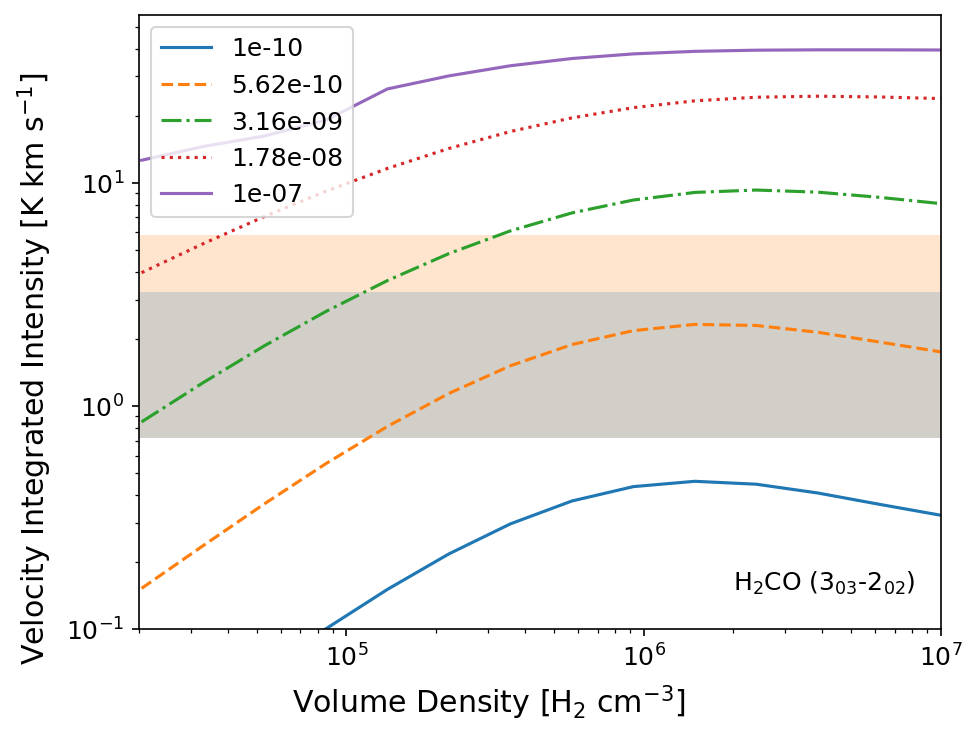

In [36]:
lines = ["-","--","-.",":"]
linecycler = cycle(lines)

g5.Tg = 60

fig, axs = plt.subplots(1, sharex=True, gridspec_kw={'hspace': 0}, constrained_layout=True, dpi=150)

vol_dense = 10**np.linspace(1, 7, num=30) 
abundance = 10**np.linspace(-10, -7, num=5)

m_h2co = 30.031*u.Da
vs = np.sqrt(const.k_B * g5.Tg*u.K / m_h2co)

for a in abundance:
    for n in range(vol_dense.size): 
        g5.nH = vol_dense[n]
        g5.sigmaNT = 2e-14 * g5.colDen / g5.nH
        
        #print(g5.sigmaNT)
        g5.addEmitter("ph2co-h2", a)
        lines = g5.lineLum("ph2co-h2")
        #print(g5.colDen, g5.nH, g5.sigmaNT)
        l = lines[2]
        
        if g5.sigmaNT*u.cm/u.second < vs:
            #print('don\'t plot?')
            #vs =np.sqrt(k * T / m_h2co)
            TB[n] = l['intTB']
        else: 
            TB[n] = np.nan
    # what
    lab = format(a, '.3g') #str(a)
    title = 'Abundance: ' + str(a)
    axs.plot(vol_dense, TB, next(linecycler), label=lab)

# H2CO        
#axs[1].axhspan(0.47637372, 5.9633835, facecolor='tab:orange', alpha=0.2) # a
#axs[1].axhspan(0.47637372, 3.311673, facecolor='tab:blue', alpha=0.2) # b
axs.axhspan(0.71664655, 5.8476086, facecolor='tab:orange', alpha=0.2) # a
axs.axhspan(0.71664655, 3.2353006, facecolor='tab:blue', alpha=0.2) # b

axs.set_xscale('log')
axs.set_yscale('log')
axs.set_ylim(bottom=0.1)
axs.legend(loc='upper left')

axs.set_xlim(left=2*10**4, right=10**7)

fig.supxlabel('Volume Density [H$_2$ cm$^{-3}$]')
fig.supylabel('Velocity Integrated Intensity [K km s$^{-1}$]')

axs.text(2*10**6, 0.15, 'H$_2$CO (3$_{03}$-2$_{02}$)')

#fig.set_figheight(8)
#fig.set_figwidth(8)

